In [10]:
# Libraries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from ydata_profiling import ProfileReport

# Qualitative Dependent Variable Models

### 1. Briefly discuss your data and economic/finance/business question you are trying to answer with your model.

In [ ]:
# Placeholder for Connor

### 2. Provide a descriptive analysis of your variables. This should include histograms and fitted distributions, correlation plot, boxplots, scatterplots, and statistical summaries (e.g., the five-number summary). All figures must include comments.

#### Variable Description

age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25

steps: average walking steps per day of policyholder

children: number of children / dependents of policyholder

smoker: smoking state of policyholder (non-smoke=0;smoker=1)

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance

insuranceclaim: yes=1, no=0

In [2]:
df=pd.read_csv('Hinsurance.csv')
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [4]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
df.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
#age, sex, children, smoker, charges, bmi, steps

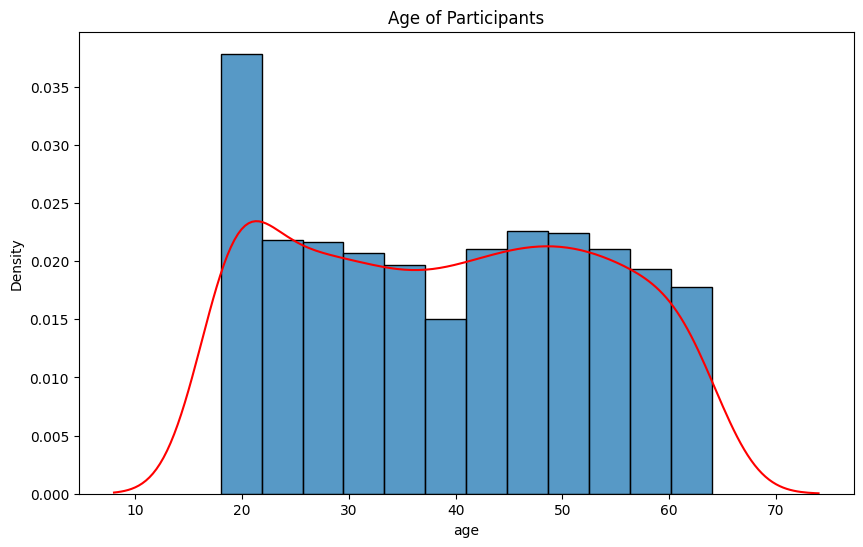

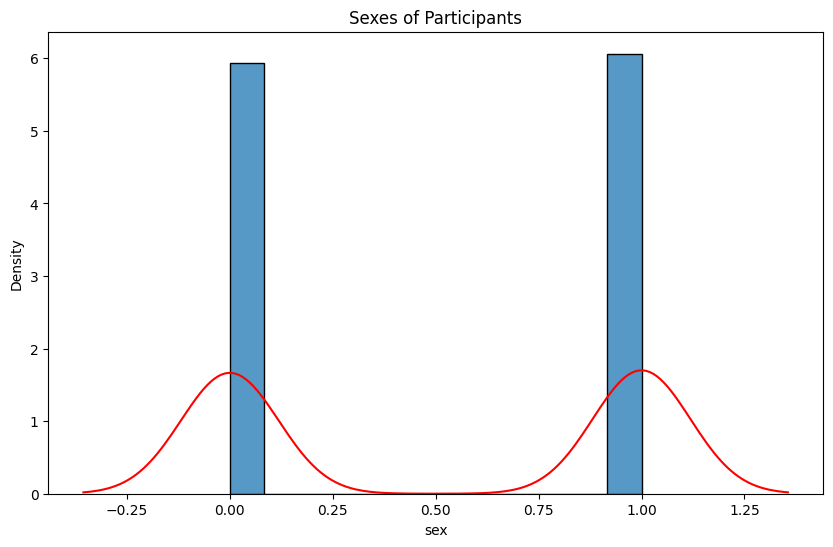

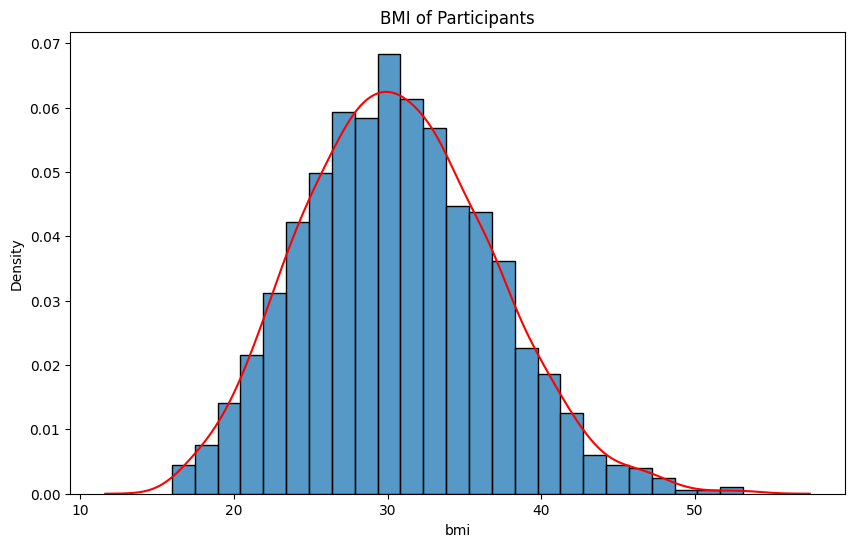

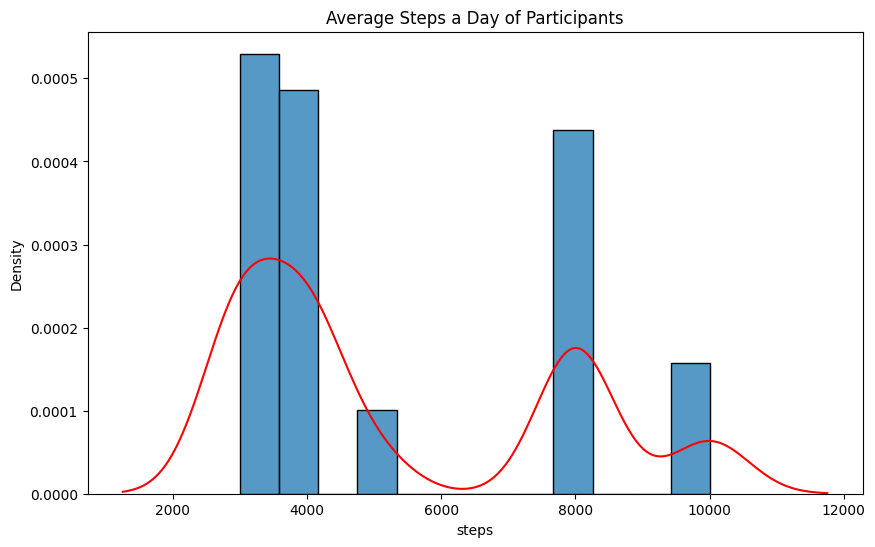

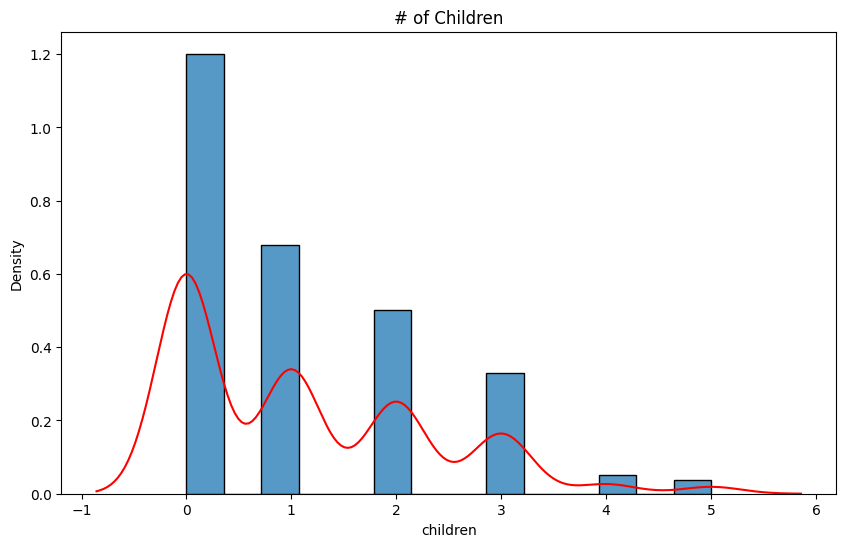

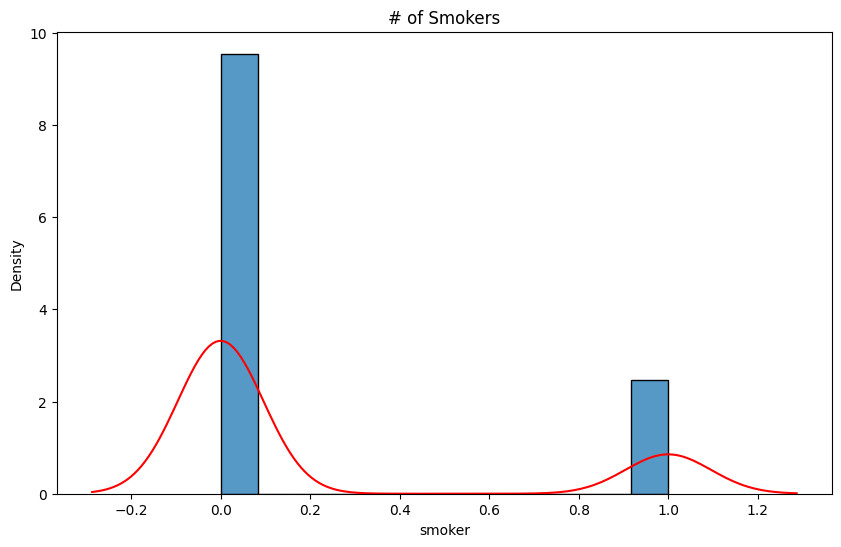

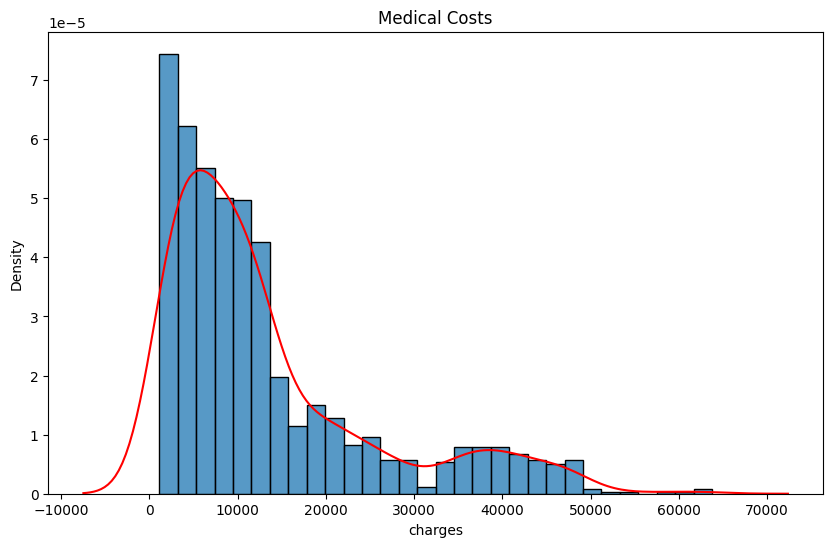

In [7]:
# Histograms and Density plots

plt.figure(figsize = (10,6))
sns.histplot(df.age, stat = "density")
sns.kdeplot(df.age, color = "red")
plt.title("Age of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.sex, stat = "density")
sns.kdeplot(df.sex, color = "red")
plt.title("Sexes of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.bmi, stat = "density")
sns.kdeplot(df.bmi, color = "red")
plt.title("BMI of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.steps, stat = "density")
sns.kdeplot(df.steps, color = "red")
plt.title("Average Steps a Day of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.children, stat = "density")
sns.kdeplot(df.children, color = "red")
plt.title("# of Children")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.smoker, stat = "density")
sns.kdeplot(df.smoker, color = "red")
plt.title("# of Smokers")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.charges, stat = "density")
sns.kdeplot(df.charges, color = "red")
plt.title("Medical Costs")
plt.show()

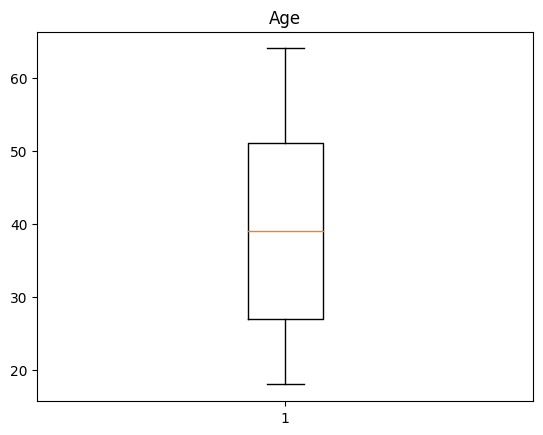

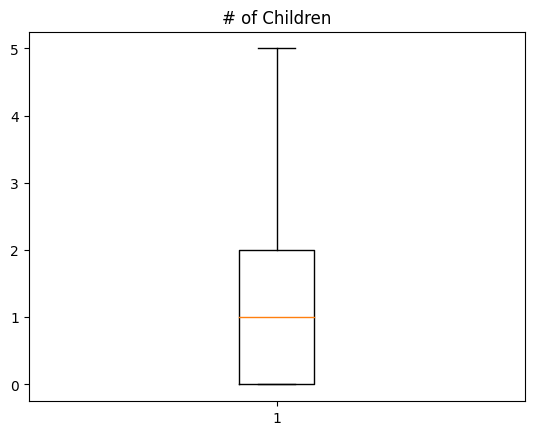

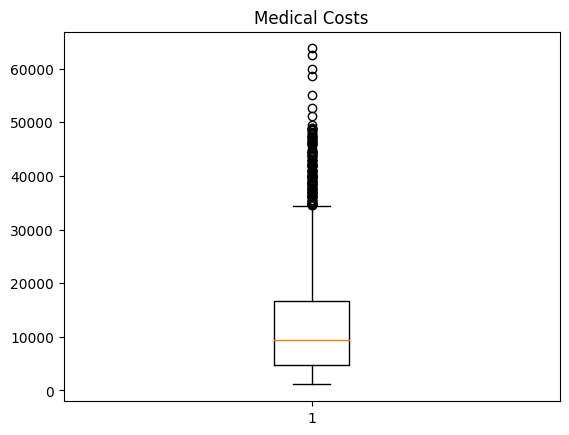

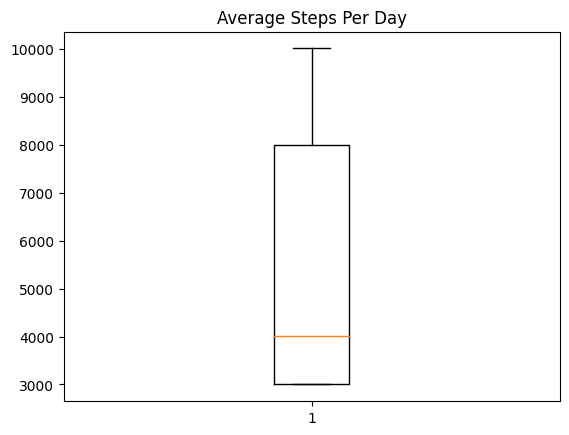

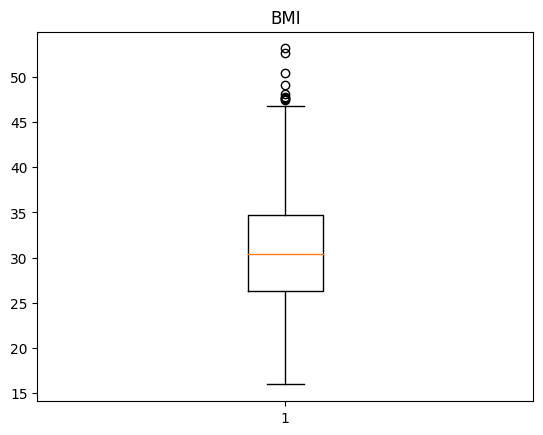

In [15]:
#Boxplots

#Five number summary can be found in df.describe() above 

plt.boxplot(df.age)
plt.title('Age')
plt.show()

plt.boxplot(df.children)
plt.title('# of Children')
plt.show()

plt.boxplot(df.charges)
plt.title('Medical Costs')
plt.show()

plt.boxplot(df.steps)
plt.title('Average Steps Per Day')
plt.show()

plt.boxplot(df.bmi)
plt.title('BMI')
plt.show()

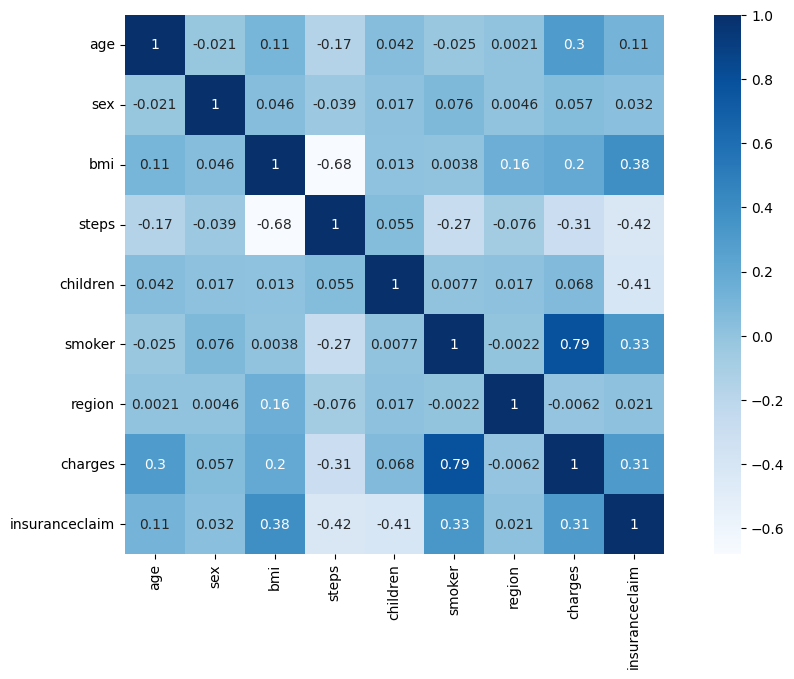

In [8]:
# Correlation Plot
plt.figure(figsize=(13,7))
data = df
c = data.corr()
sns.heatmap(c,cmap = "Blues", annot = True, square = True)
plt.show()

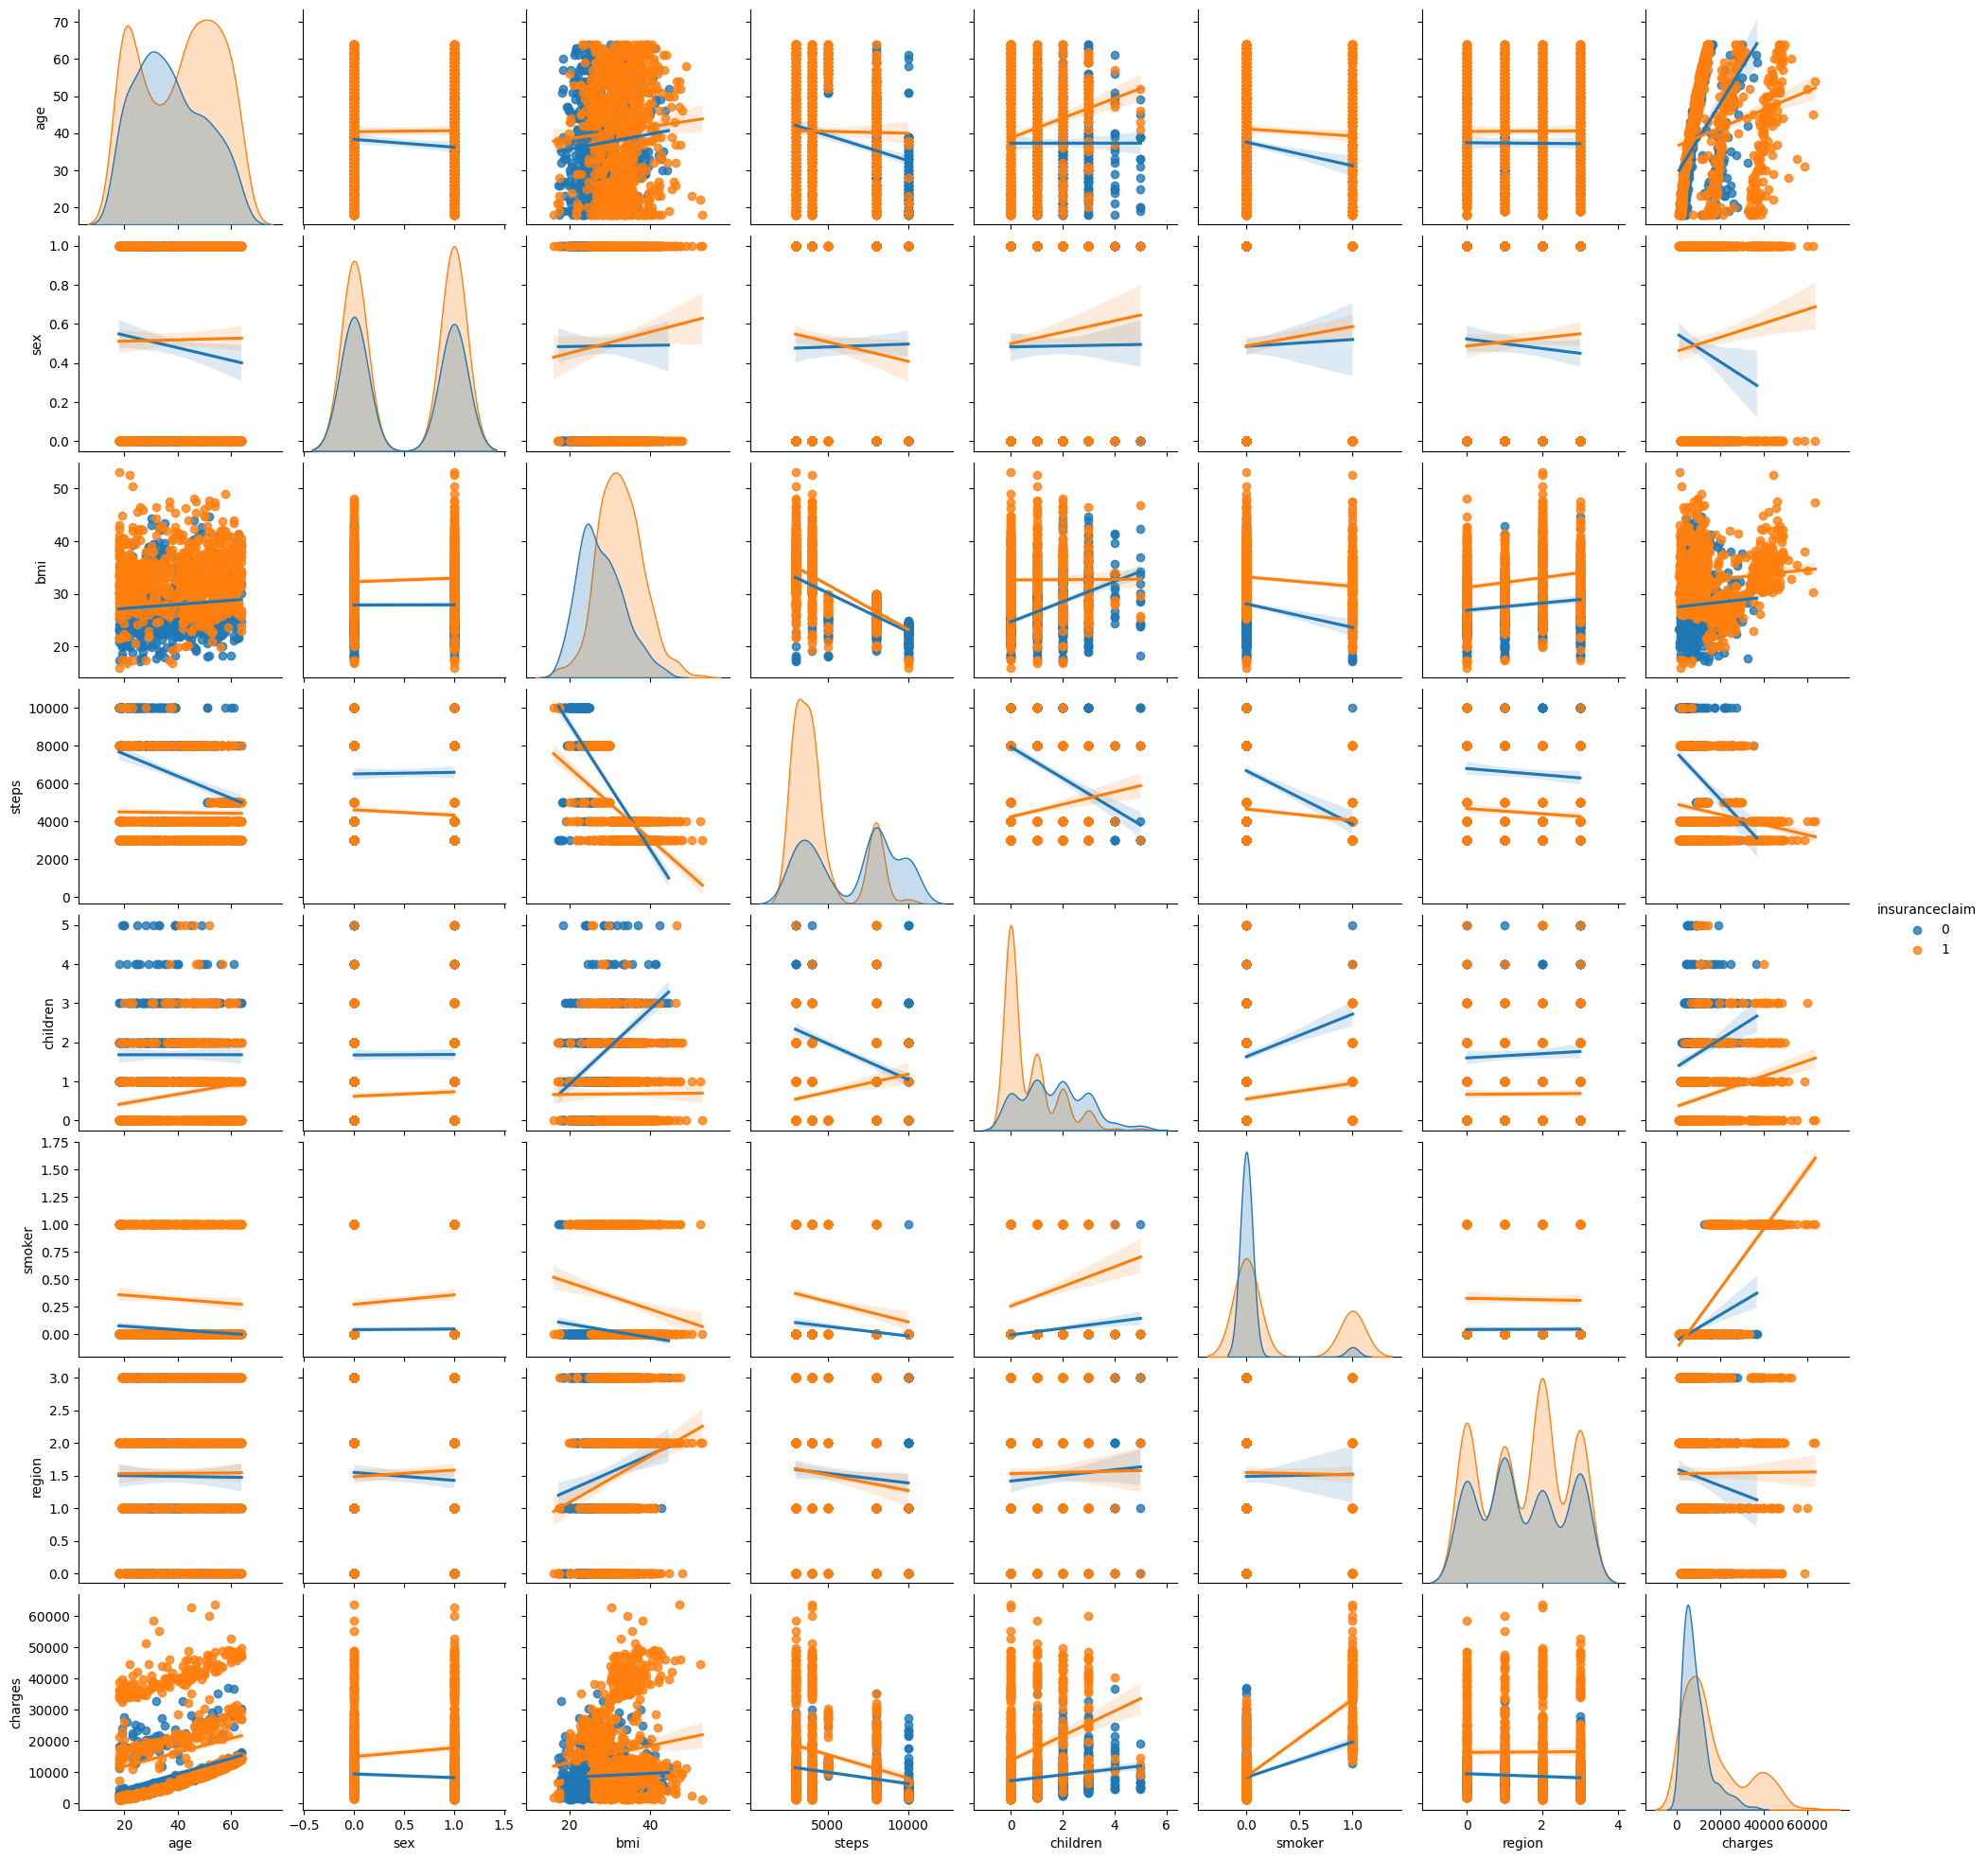

In [9]:
# Pair Plot
sns.pairplot(df, kind = 'reg', hue='insuranceclaim')
plt.show()

In [11]:
# Profile Report
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
f = Fitter(df.age)
f.fit()
f.summary()

In [ ]:
g = Fitter(df.children)
g.fit()
g.summary()

In [ ]:
h = Fitter(df.charges)
h.fit()
h.summary()

In [ ]:
i = Fitter(df.steps)
i.fit()
i.summary()

In [ ]:
j = Fitter(df.bmi)
j.fit()
j.summary()

### 3. Fit the three models below, and identify which model is your preferred one and why. Makesure to include relevant plots, statistical diagnostics, etc., to support your conclusion, and to comment on your findings.
### • Linear Probability Model
### • Probit Model
### • Logit Model

### 4. Using your preferred model, make 4 different predictions, and comment on their reliability.